In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [ ]:
df = pd.read_excel("bpp_training_data.xlsx")
df.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear
0,1646770,9500,1126363,8434,132,17,1974,17,0,4593,...,0,1,8,6,0,0,1989,1,17,17
1,1821514,14000,1194089,10150,132,31,1980,31,0,1820,...,0,0,0,0,4,2,1989,1,31,31
2,1505138,50000,1473654,4139,132,31,1978,31,0,2348,...,0,1,8,6,0,0,1989,1,31,31


Making Sales Price as last column 

In [ ]:
cols = list(df.columns.values)
cols.pop(cols.index('SalePrice'))
df = df[cols+['SalePrice']]
df.head(3)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear,SalePrice
0,1646770,1126363,8434,132,17,1974,17,0,4593,1744,...,1,8,6,0,0,1989,1,17,17,9500
1,1821514,1194089,10150,132,31,1980,31,0,1820,559,...,0,0,0,4,2,1989,1,31,31,14000
2,1505138,1473654,4139,132,31,1978,31,0,2348,713,...,1,8,6,0,0,1989,1,31,31,50000


In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index

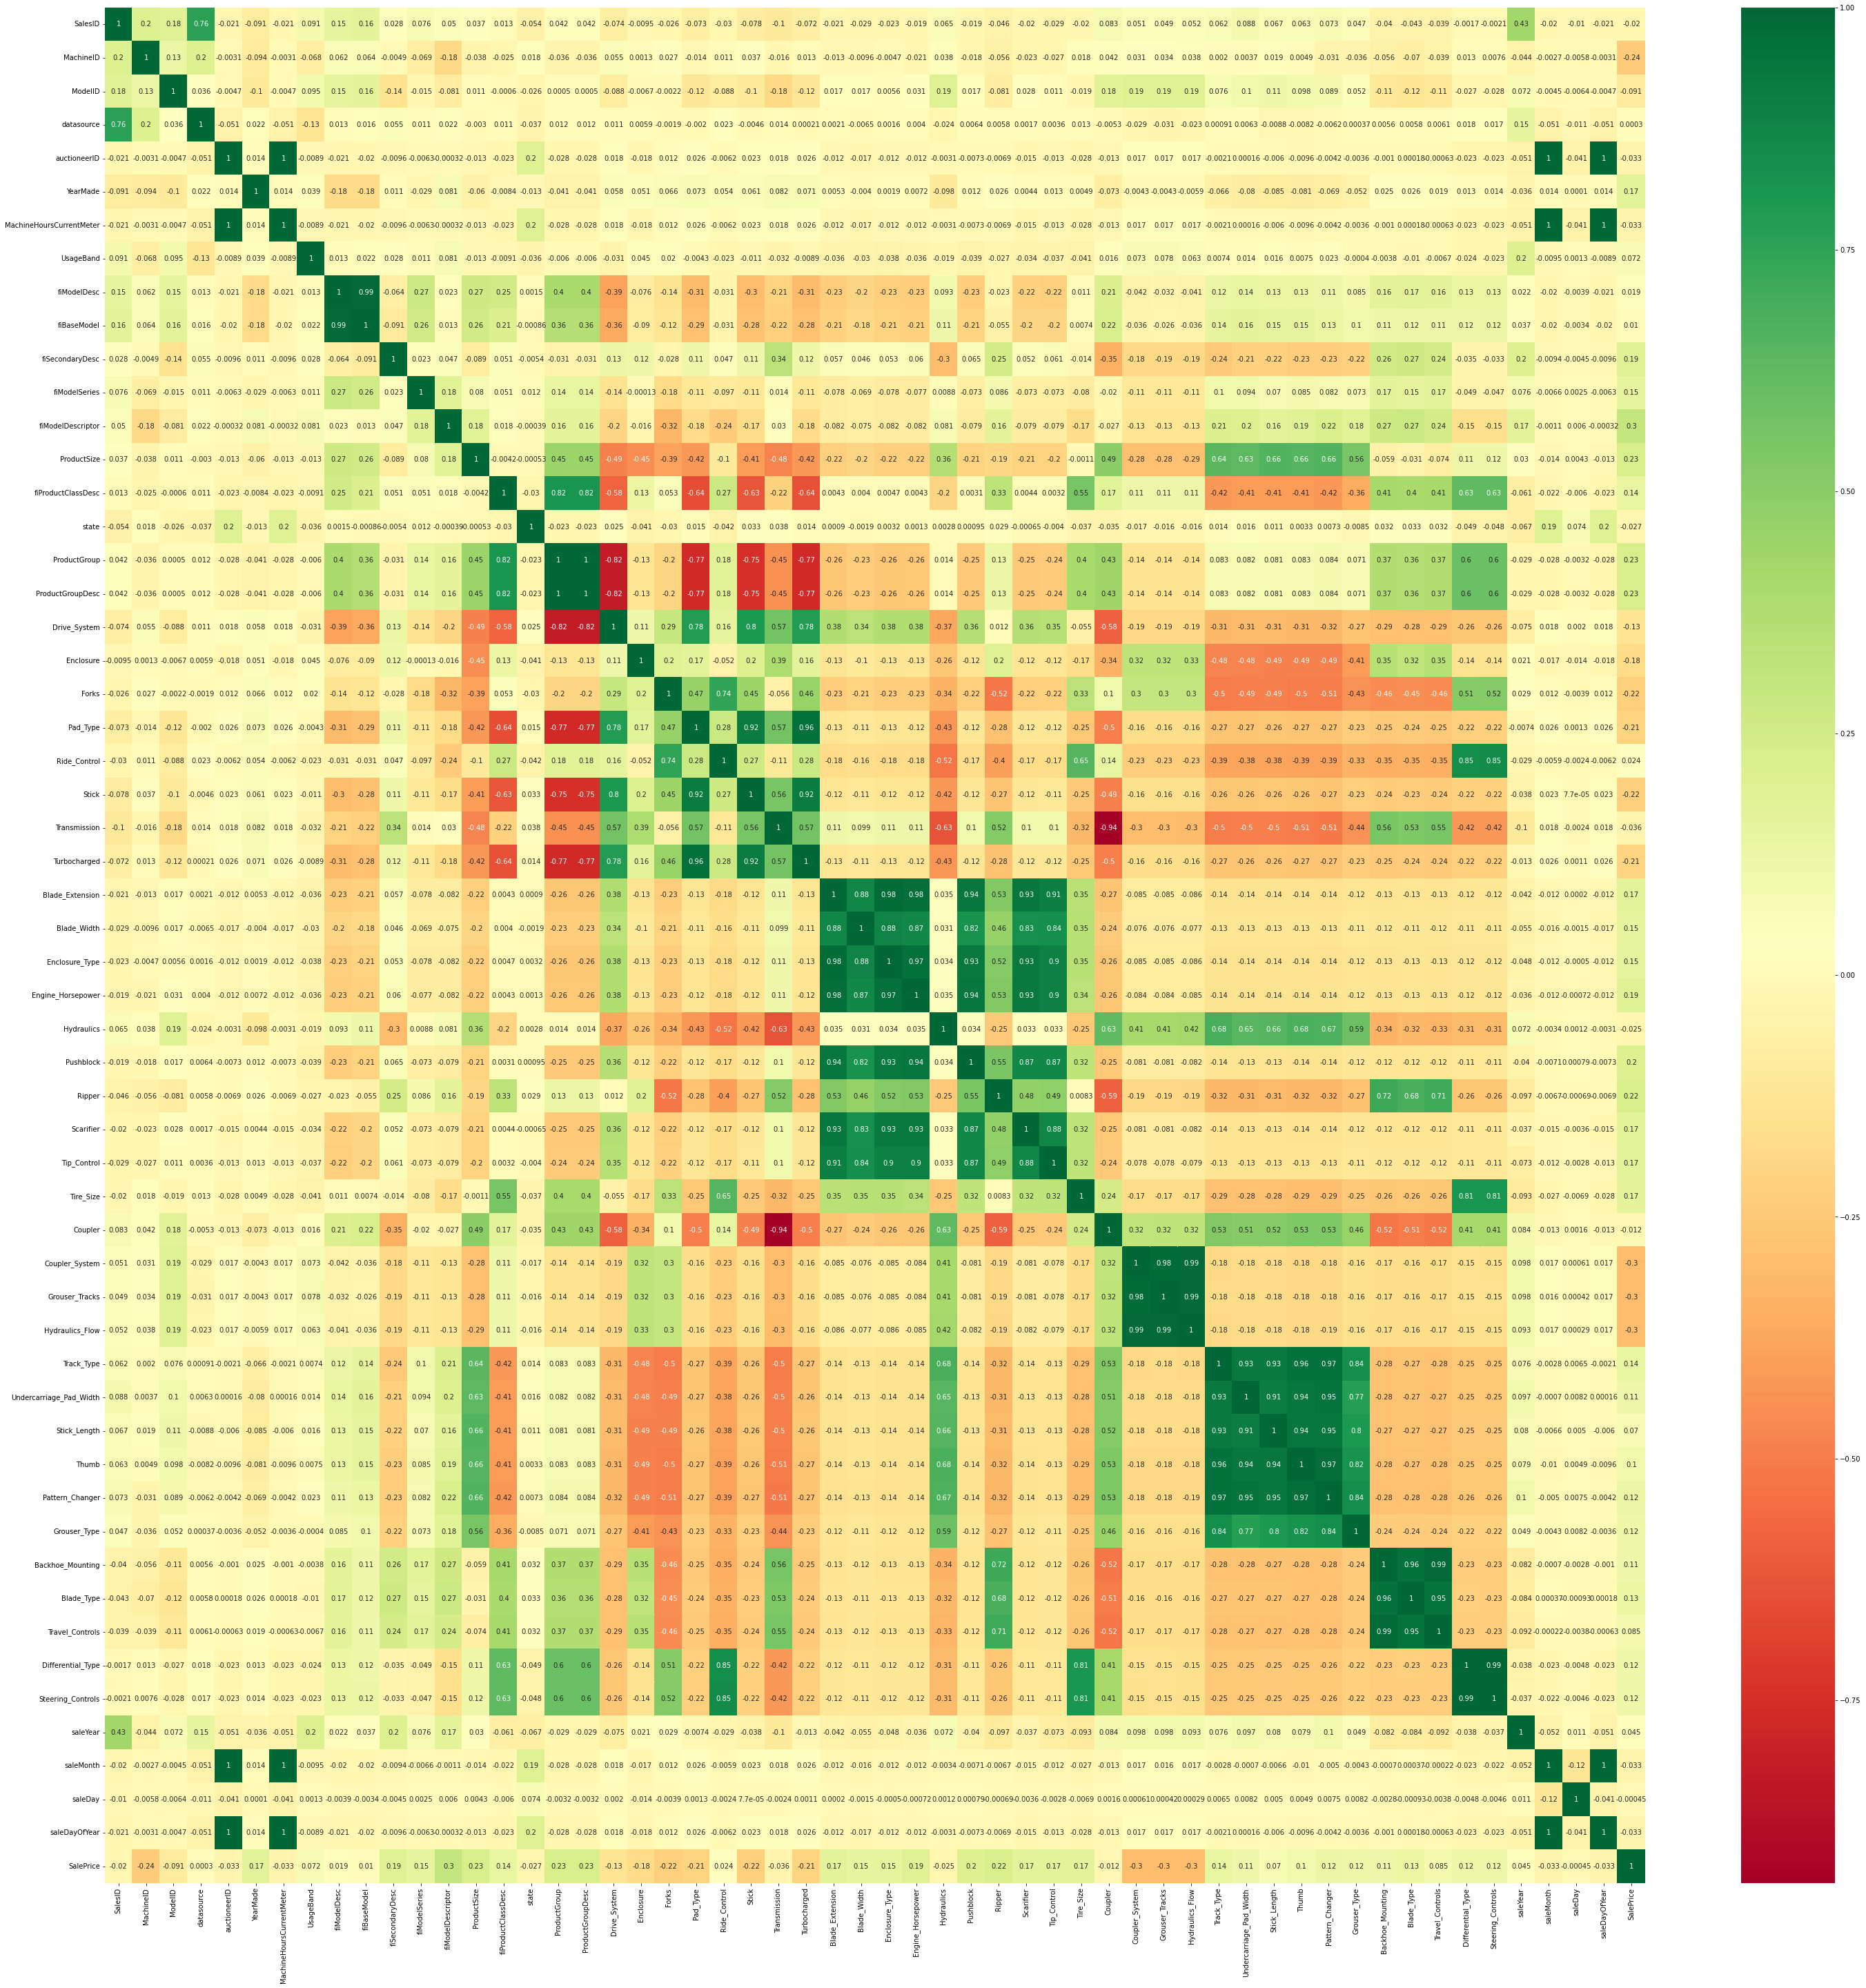

In [ ]:
plt.figure(figsize=(50,50))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Linear Regression

In [ ]:
x = df.iloc[:,:-1].values  # Numpy array of other features
y = df.iloc[:,-1].values   # Numpy array of sales price

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
import math
print('R2 Score Test: ',r2_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error: ', mse)

R2 Score Test:  0.4190212852589459
Root mean square error:  17518.779788844546


## To be deleated

Now lets optimise the Multi Linear Regression Model above.

Lets use **Backward Elimination**

Backward elimination is a feature selection technique while building a machine learning model. It is used to remove those features that do not have a significant effect on the dependent variable or prediction of output.

In [ ]:
import pandas.util.testing as tm
import statsmodels.api as smf

In [ ]:
x = np.append(arr = np.ones((300000,1)).astype(int),values = x, axis = 1)   # Appending col with 1's to the x feature matrix

In [ ]:
lis= []
for i in range(0,56):
    lis.append(i)
x_opt=x [:, lis]  
regressor_OLS=smf.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     4124.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:10:21   Log-Likelihood:            -3.3556e+06
No. Observations:              300000   AIC:                         6.711e+06
Df Residuals:                  299947   BIC:                         6.712e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.091e+05   1.63e+04     18.976      0.000    2.77e+05    3.41e+05
x1            -0.0004      0.000     -2.281      0.023      -0.001   -5.34e-05
x2            -0.0074   9.19e-05    -80.542      0.000      -0.008      -0.007
x3             0.0409      0.006      6.482      0.000       0.029       0.053
x4            64.2397     15.521      4.139      0.000      33.819      94.660
x5            23.2953     13.754      1.694      0.090      -3.662      50.252
x6            10.7609      0.119     90.261      0.000      10.527      10.995
x7            23.2953     13.754      1.694      0.090      -3.662      50.252
x8          2384.5214     51.217     46.558      0.000    2284.138    2484.905
x9            -4.1777      0.252    -16.577      0.000      -4.672      -3.684
x10           10.5377      0.677     15.574      0.000       9.212      11.864
x11           98.6275      0.983    100.377      0.000      96.702     100.553
x12           70.3338      1.319     53.310      0.000      67.748      72.920
x13          125.4105      1.401     89.516      0.000     122.665     128.156
x14         1276.7306     27.409     46.580      0.000    1223.009    1330.452
x15          -11.6760      8.386     -1.392      0.164     -28.113       4.761
x16          -18.1190      2.157     -8.401      0.000     -22.346     -13.892
x17         3162.5515     93.395     33.862      0.000    2979.501    3345.602
x18         3162.5515     93.395     33.862      0.000    2979.501    3345.602
x19        -2124.7123     74.807    -28.402      0.000   -2271.333   -1978.092
x20         -293.0097     19.373    -15.124      0.000    -330.981    -255.038
x21         1888.2441    196.942      9.588      0.000    1502.244    2274.244
x22          121.4234    167.848      0.723      0.469    -207.553     450.400
x23         1.287e+04    207.225     62.103      0.000    1.25e+04    1.33e+04
x24        -1123.4856    153.272     -7.330      0.000   -1423.895    -823.077
x25         1356.7626     58.882     23.042      0.000    1241.355    1472.170
x26         -734.3498    322.380     -2.278      0.023   -1366.206    -102.494
x27         8790.1076    829.410     10.598      0.000    7164.487    1.04e+04
x28          911.2251     68.892     13.227      0.000     776.199    1046.251
x29        -1.642e+04    252.301    -65.089      0.000   -1.69e+04   -1.59e+04
x30         2.879e+04    645.224     44.624      0.000    2.75e+04    3.01e+04
x31          311.2242     17.559     17.725      0.000     276.810     345.638
x32         1.799e+04    348.632     51.591      0.000    1.73e+04    1.87e+04
x33         1925.7731    124.298     15.493      0.000    1682.153    2169.393
x34         6516.2352    254.762     25.578      0.000    6016.909    7015.562
x35         1733.5470    201.868      8.588      0.000    1337.892    2129.202
x3

From the table, we will choose the highest p-value, which is for x42=0.673. So in next iteration remove x42 and again perform above step.

In [ ]:
lis= []
dont_care = [42,22]
for i in range(0,56,38):
    if i not in dont_care:
        lis.append(i)
x_opt=x [:, lis]  
regressor_OLS=smf.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                 2.887e+04
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:19:48   Log-Likelihood:            -3.4227e+06
No. Observations:              300000   AIC:                         6.845e+06
Df Residuals:                  299998   BIC:                         6.845e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.322e+04     41.922    792.376      0.000    3.31e+04    3.33e+04
x1         -2.191e+04    128.959   -169.904      0.000   -2.22e+04   -2.17e+04
==============================================================================
Omnibus:                    83662.922   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           204378.858
Skew:                           1.558   Prob(JB):                         0.00
Kurtosis:                       5.578   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So only the x1 independent variable is a significant variable for the prediction. So we can now predict efficiently using this variable.

In [ ]:
# ERROR
x_BE = df.iloc[:,:-1].values  # Numpy array of other features
y_BE = df.iloc[:,-1].values   # Numpy array of sales price

from sklearn.model_selection import train_test_split
x_BE_train,x_BE_test,y_BE_train,y_BE_test = train_test_split(x_BE,y_BE,test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(np.array(x_BE_train).reshape(-1,1),y_BE_train)

y_pred = regressor.predict(x_test)

print('Train Score: ',regressor.score(x_BE_train,y_BE_train))
print('Test Score: ',regressor.score(x_BE_test,y_BE_test))

In [ ]:
print(x_BE_train.shape)
print(y_BE_train.shape)

(240000, 55)
(240000,)


# Polynomial Regression

Polynomial Regression

In [ ]:
x = df.iloc[:,:-1].values  # Numpy array of other features
y = df.iloc[:,-1].values   # Numpy array of sales price

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

poly_regs = PolynomialFeatures(degree=2)
x_poly_train = poly_regs.fit_transform(x_train)
x_poly_test = poly_regs.transform(x_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly_train,y_train)
y_poly_pred = lin_reg_2.predict(x_poly_test)

0.723493979313081


In [ ]:
from sklearn.metrics import r2_score
import math
print('R2 Score Test: ',r2_score(y_test,y_poly_pred))
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test, y_poly_pred))
print('Root mean square error: ', mse)

R2 Score Test:  0.723493979313081
Root mean square error:  12085.817693215768


Unable to Try higher order polynomial as it tells session crashed

# KNN Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 9)
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
from sklearn.metrics import r2_score
import math
print('R2 Score: ',r2_score(y_test,pred))
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test, pred))
print('Root mean square error: ', mse)

R2 Score:  0.39131577118092253
Root mean square error:  17931.62993214286


In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 12)
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set

R2 Score:  0.39131577118092253
Root mean square error:  17931.62993214286


In [ ]:
from sklearn.metrics import r2_score
import math
print('R2 Score: ',r2_score(y_test,pred))
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test, pred))
print('Root mean square error: ', mse)

R2 Score:  0.6395296515816795
Root mean square error:  13799.346376965184


In [ ]:
test_scaled = scaler.fit_transform(x_test)
test = pd.DataFrame(test_scaled)
#predicting on the test set and creating submission file
predict = model.predict(test)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

# Decision Tree

Decision Tree as Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
x = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
from sklearn.metrics import r2_score
import math
print('R2 Score: ',r2_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error: ', mse)

R2 Score:  0.815328534156184
Root mean square error:  9876.967871380535


In [ ]:
# AFTER APPLIED RANDOM PRUNING
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error

x = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

regressor = DecisionTreeRegressor(max_depth = 30,random_state = 0,min_samples_split = 40,min_samples_leaf = 2)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
print("R2 score",r2_score(y_test,y_pred))
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error', mse)

R2 score 0.8665250744750975
Root mean square error 8396.989042108167


# Analysis 2 Regarding Dropping Years 1000

In [ ]:
t = df.copy()
t.drop(columns = ['SalesID','MachineID','ModelID','datasource','auctioneerID','MachineHoursCurrentMeter','Hydraulics','saleDay','UsageBand','fiBaseModel','Travel_Controls','Stick_Length','Ride_Control'],inplace = True)
t.columns

Index(['SalePrice', 'YearMade', 'fiModelDesc', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Stick',
       'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width',
       'Enclosure_Type', 'Engine_Horsepower', 'Pushblock', 'Ripper',
       'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Differential_Type',
       'Steering_Controls', 'saleYear', 'saleMonth', 'saleDayOfYear'],
      dtype='object')

In [ ]:
t.head(2)

,SalePrice,YearMade,fiModelDesc,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,...,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDayOfYear
0,9500,1974,4593,0,0,0,4,47,44,5,...,0,0,0,1,8,0,0,1989,1,17
1,14000,1980,1820,0,0,0,0,60,9,6,...,0,0,0,0,0,4,2,1989,1,31


In [ ]:
k = t[['YearMade','fiModelDesc']].groupby('YearMade').count()
k = k.sort_values(by = ['fiModelDesc'])
k.style

,fiModelDesc
YearMade,
2009,1
1937,1
1942,1
1947,1
1949,1
1954,2
1948,2
1953,4
1955,5


In [ ]:
k = t[['ProductSize','fiModelDesc']].groupby('ProductSize').count()
k = k.sort_values(by = ['fiModelDesc'])
k.style

,fiModelDesc
ProductSize,
1,4006
2,17509
5,18208
6,20922
3,34882
4,46508
0,157965


## Replacing Year by its Median and then cal Random Forest

In [ ]:
t['YearMade'].median()

1993.0

In [ ]:
t = t.replace(to_replace = [1000], value = [1993])

In [ ]:
k = t[['YearMade','fiModelDesc']].groupby('YearMade').count()
k = k.sort_values(by = ['fiModelDesc'])
k.style

,fiModelDesc
YearMade,
2009,1
1937,1
1942,1
1947,1
1949,1
1948,2
1954,2
1953,4
1955,5


In [ ]:
x = t.iloc[:,:-1].values 
y = t.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
regressor = RandomForestRegressor(max_depth=30, random_state=0, max_features = 0.80,n_jobs = -1,oob_score = True)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
from sklearn.metrics import r2_score
import math
print('R2 Score: ',r2_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error: ', mse)

NameError: ignored

## Dropping 1000 year rows

In [ ]:
t.drop(df[df['YearMade'] == 1000].index, inplace = True)

In [ ]:
k = t[['YearMade','fiModelDesc']].groupby('YearMade').count()
k = k.sort_values(by = ['fiModelDesc'])
k.style

,fiModelDesc
YearMade,
2009,1
1937,1
1942,1
1947,1
1949,1
1948,2
1954,2
1953,4
1955,5


In [ ]:
x = t.iloc[:,:-1].values 
y = t.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
regressor = RandomForestRegressor(max_depth=30, random_state=0, max_features = 0.80,n_jobs = -1,oob_score = True)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
from sklearn.metrics import r2_score
import math
print('R2 Score: ',r2_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error: ', mse)

R2 Score:  0.9153451738279159
Root mean square error:  6726.958925546491


# Random Forest

In [ ]:
df1 = df.copy()
df1.drop(columns = ['SalesID','MachineID','ModelID','datasource','auctioneerID','MachineHoursCurrentMeter','Hydraulics','saleDay'
,'UsageBand','fiBaseModel','YearMade','fiSecondaryDesc','fiModelSeries','fiModelDescriptor','ProductSize','Hydraulics_Flow',
'Coupler_System','Grouser_Tracks','Stick','Travel_Controls','Stick_Length','saleYear','Ride_Control','fiModelDesc',
'Coupler','state','Thumb','Undercarriage_Pad_Width','Transmission','saleDayOfYear'],inplace = True)
corrmat = df1.corr()
k = corrmat.iloc[:,-1]
k.sort_values(ascending = True)

Forks                -0.222390
Turbocharged         -0.211307
Pad_Type             -0.207460
Enclosure            -0.180559
Drive_System         -0.130630
saleMonth            -0.032637
Backhoe_Mounting      0.112450
Differential_Type     0.115685
Steering_Controls     0.118219
Grouser_Type          0.121429
Pattern_Changer       0.122488
Blade_Type            0.134714
fiProductClassDesc    0.140360
Track_Type            0.142651
Blade_Width           0.150988
Enclosure_Type        0.152266
Tire_Size             0.165574
Scarifier             0.169205
Blade_Extension       0.172831
Tip_Control           0.174324
Engine_Horsepower     0.188292
Pushblock             0.198891
Ripper                0.220398
ProductGroupDesc      0.234938
ProductGroup          0.234938
SalePrice             1.000000
Name: SalePrice, dtype: float64

In [ ]:
# Pending
# increase n-estimators too 1000
t = df.copy()
t.drop(columns = ['SalesID','MachineID','ModelID','datasource','auctioneerID','MachineHoursCurrentMeter','Hydraulics','saleDay','UsageBand','fiBaseModel','Travel_Controls','Stick_Length','Ride_Control'],inplace = True)
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

In [ ]:
t.iloc[:,:-1].columns

Index(['YearMade', 'fiModelDesc', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Differential_Type',
       'Steering_Controls', 'saleYear', 'saleMonth', 'saleDayOfYear'],
      dtype='object')

## Random Forest Fully Grown

In [ ]:
from sklearn.metrics import mean_squared_error
x = t.iloc[:,:-1].values 
y = t.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
regressor = RandomForestRegressor(random_state=0,n_jobs = -1,oob_score = True,)
regressor.fit(x_train,y_train)
y_train_predicted = regressor.predict(x_train)
y_pred = regressor.predict(x_test)
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_pred)
print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
#r2_test = r2_score(y_test,y_pred)
#r2_train = r2_score(y_test,y_pred)
from sklearn.metrics import r2_score
import math
print('R2 Score: ',r2_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error: ', mse)

Iteration: <built-in function iter> Train mse: 7169610.128640039 Test mse: 47472084.48190591
R2 Score:  0.9101349508503999
Root mean square error:  6889.998873868261


## Random Forest Pruned Version

In [ ]:
from sklearn.metrics import mean_squared_error
t.drop(df[df['YearMade'] == 1000].index, inplace = True)
x = t.iloc[:,:-1].values 
y = t.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 300, max_depth=30, random_state=0, max_features = 0.8 ,n_jobs = -1,oob_score = True,)
regressor.fit(x_train,y_train)
y_train_predicted = regressor.predict(x_train)
y_pred = regressor.predict(x_test)
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_pred)
print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
from sklearn.metrics import r2_score
import math
print('R2 Score: ',r2_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error: ', mse)

Iteration: <built-in function iter> Train mse: 6827414.685674989 Test mse: 45845978.89294167
R2 Score:  0.913213182199824
Root mean square error:  6770.965875925064


In [ ]:
data = [
        ['df.iloc[:,:-1].values',6986.6952598197,0.9075948627],
        ['df.iloc[:,3:-1].values',6954.478151855481,0.9084450966520445],
        ['MachineHoursCurrentMeter',6951.070181718597,0.908534805734303],
        ['Hydraulics',6950.118228489115,0.9085598564452312],
        ['saleDay',6914.676985654516,0.9094900534071746],
        ['UsageBand',6903.998333535522,0.9097693948460225],
        ['fiBaseModel',6898.712624987501,0.9099075032544655],
        ['Travel_Controls',6895.79656242199,0.9099836507466205],
        ['Stick_Length',6894.393835279846,0.9100202688610267],
        ['Done Feature Reduction->Ride_Control',6889.993377126803,0.9101350942364158],
        ['n_estimators: 200',6872.826844222608,0.9105823361958335],
        ['max_features: 0.9',6822.527197862059,0.9118863755853933],
        ['max_features: 0.85',6809.784785259544,0.9122152072980934],
        ['Best: maxFeatures: 0.80 and minSampleLeaf:dontMention',6782.840785575035,0.9129085020821469],
        ['n_estimators: 300 max_depth:30',6770.965875925064,0.913213182199824],
        ['n_estimators: 300,max_depth:40',6775.58269818749,0.9130947896624507],
        ['Replacing Year 1000 to 1993',6810.114735162077,0.9122067003374742],
        ['Dropping Year 1000', 6726.958925546491,0.9153451738279159],
        ['Dropping Year 1000,n_estimators: 300 max_depth:30',6700,0.9160009]
        ]
z = pd.DataFrame(data, columns = ['command','rmse','r2'])
z = z.sort_values(by = ['rmse'],ascending = False)
z.style\
    .background_gradient(cmap="Reds", subset=['rmse'])\
    .background_gradient(cmap="Greens", subset=['r2'])

,command,rmse,r2
0,"df.iloc[:,:-1].values",6986.695260,0.907595
1,"df.iloc[:,3:-1].values",6954.478152,0.908445
2,MachineHoursCurrentMeter,6951.070182,0.908535
3,Hydraulics,6950.118228,0.908560
4,saleDay,6914.676986,0.909490
5,UsageBand,6903.998334,0.909769
6,fiBaseModel,6898.712625,0.909908
7,Travel_Controls,6895.796562,0.909984
8,Stick_Length,6894.393835,0.910020
9,Done Feature Reduction->Ride_Control,6889.993377,0.910135


In [ ]:
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error

k = 0
for i in range(2,11):
    print('For i is',i)
    x = t.iloc[:,:-1].values 
    y = t.iloc[:,-1].values
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
    regressor = RandomForestRegressor(max_depth=10, random_state= 0, max_features = 0.1,n_jobs = -1,oob_score = True, min_samples_split = i)
    regressor.fit(x_train,y_train)
    y_pred = regressor.predict(x_test)
    print('R2 Score: ',r2_score(y_test,y_pred))
    mse = math.sqrt(mean_squared_error(y_test, y_pred))
    print('Root mean square error: ', mse)
    k = k + 0.1
        

For i is 2
R2 Score:  0.6863006519750559
Root mean square error:  12873.023168405827
For i is 3
R2 Score:  0.6835666603982193
Root mean square error:  12928.997760154089
For i is 4
R2 Score:  0.6816026901171317
Root mean square error:  12969.05815571008
For i is 5
R2 Score:  0.6875581081180555
Root mean square error:  12847.19666236047
For i is 6
R2 Score:  0.6881960520565178
Root mean square error:  12834.074255812782
For i is 7
R2 Score:  0.6843340222286184
Root mean square error:  12913.3116103817
For i is 8
R2 Score:  0.6880225021977253
Root mean square error:  12837.645477312915
For i is 9
R2 Score:  0.6872117439369428
Root mean square error:  12854.31570804132
For i is 10
R2 Score:  0.6844924208268865
Root mean square error:  12910.071306921545


# Summary

In [ ]:
import pandas as pd

In [ ]:
data = [
        ['gurudeep','linear',17518.7797888445,0.4190212852],
        ['gurudeep','polynomial',12085.8176932157,0.7234939793],
        ['gurudeep','decision',9876.9678713805,0.8153285341],
        ['gurudeep','random',6700.000000,0.916001],
        ['gurudeep','knn',13799.34637696518,0.6395296515],
        ['gurudeep','elastic',17931.6299321428,0.3913157711],
        ]
df = pd.DataFrame(data, columns = ['author','model','rmse','r2'])

In [ ]:
df = df.sort_values(by = ['rmse'])
df.style.background_gradient(cmap='Reds',subset = ['rmse','r2'])

,author,model,rmse,r2
3,gurudeep,random,6700.000000,0.916001
2,gurudeep,decision,9876.967871,0.815329
1,gurudeep,polynomial,12085.817693,0.723494
4,gurudeep,knn,13799.346377,0.639530
0,gurudeep,linear,17518.779789,0.419021
5,gurudeep,elastic,17931.629932,0.391316


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x,y)

y_pred = elastic_net.predict(x_test)
result = pd.DataFrame()
from sklearn.metrics import r2_score
import math
print('R2 Score: ',r2_score(y_test,y_pred))
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error: ', mse)

R2 Score:  0.39131577118092253
Root mean square error:  17931.62993214286


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.824e+13, tolerance: 1.564e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


# Final Submission Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [ ]:
df = pd.read_excel("bpp_training_data.xlsx")

In [ ]:
cols = list(df.columns.values)
cols.pop(cols.index('SalePrice'))
df = df[cols+['SalePrice']]
t = df.copy()
t.drop(columns = ['SalesID','MachineID','ModelID','datasource','auctioneerID','MachineHoursCurrentMeter','Hydraulics','saleDay','UsageBand','fiBaseModel','Travel_Controls','Stick_Length','Ride_Control'],inplace = True)
t.iloc[:,:-1].columns

Index(['YearMade', 'fiModelDesc', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Differential_Type',
       'Steering_Controls', 'saleYear', 'saleMonth', 'saleDayOfYear'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
t.drop(df[df['YearMade'] == 1000].index, inplace = True)
x_train = t.iloc[:,:-1].values 
y_train = t.iloc[:,-1].values
#x_train,y_train = train_test_split(x,y,test_size = 0, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 300, max_depth=30, random_state=0, max_features = 0.8 ,n_jobs = -1,oob_score = True,)
regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, max_features=0.8, n_estimators=300,
                      n_jobs=-1, oob_score=True, random_state=0)

In [ ]:
df1 = pd.read_excel("bpp_test.xlsx")

In [ ]:
df1_copy = df1.copy()
df1_copy.drop(columns = ['SalesID','MachineID','ModelID','datasource','auctioneerID','MachineHoursCurrentMeter','Hydraulics','saleDay','UsageBand','fiBaseModel','Travel_Controls','Stick_Length','Ride_Control'],inplace = True)
y_pred = regressor.predict(df1_copy.iloc[:,:].values)

In [ ]:
df_final_predictions = pd.DataFrame(y_pred)
df_final_predictions.rename(columns = {0:'SalePrice'},inplace = True)
df_final_predictions.head()

,SalePrice
0,74762.250000
1,16072.980159
2,24276.805556
3,65211.666667
4,11481.666667


In [ ]:
# AI_R1_R2_CSE_R3_R4.csv
df_final_predictions.to_csv('ourFinalPredictions.csv',index = False)
from google.colab import files 
files.download('ourFinalPredictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>